### Create your own custom dataset featuring 3 custom categories of at least 100 images each

#### I had created a own dataset using vegetable images of 9 categories named Bean, Bitter_Gourd, Bottle_Gourd, Broccoli, Carrot, Potato, Pumpkin, Radish, Tomato, and each category have maximum 200 images and stored the dataset and accesing my dataset from directory, total images of dataset was 1677.

In [1]:
import os

# Define the main data directory
data_dir = "vegetable_dataset_harika"
# Count images and print size
total_images = 0
for root, _, files in os.walk(data_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Adjust for your image formats
            total_images += 1
            image_path = os.path.join(root, file)

print("Total images in the dataset:", total_images)


Total images in the dataset: 1677


Showing all the nine classes first and few second images of the dataset.

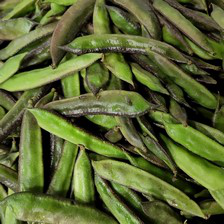

In [2]:
import pathlib
from PIL import Image

bean_path = pathlib.Path(data_dir) / "Bean"  # Ensure correct path using pathlib
bean_imgs = list(bean_path.glob('*.jpg'))  # Adjust file extension if needed

Image.open(str(bean_imgs[1]))

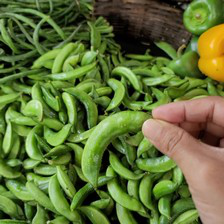

In [3]:
Image.open(str(bean_imgs[2]))

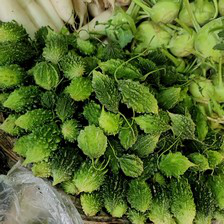

In [4]:
bittergourd_path = pathlib.Path(data_dir) / "Bitter_Gourd"  # Ensure correct path using pathlib
bittergourd_imgs = list(bittergourd_path.glob('*.jpg'))  # Adjust file extension if needed

Image.open(str(bittergourd_imgs[0]))

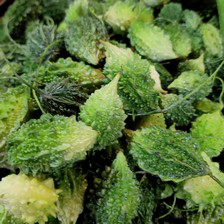

In [5]:
Image.open(str(bittergourd_imgs[2]))

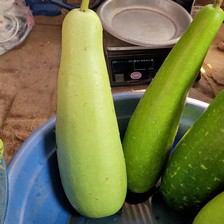

In [6]:
bottlegourd_path = pathlib.Path(data_dir) / "Bottle_Gourd"
bottlegourd_imgs = list(bottlegourd_path.glob('*.jpg'))

Image.open(str(bottlegourd_imgs[1]))

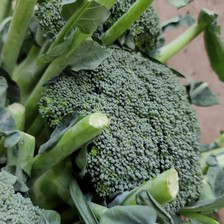

In [7]:
broccoli_path = pathlib.Path(data_dir) / "Broccoli"
broccoli_imgs = list(broccoli_path.glob('*.jpg'))

Image.open(str(broccoli_imgs[1]))

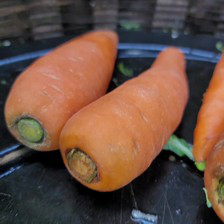

In [8]:
carrot_path = pathlib.Path(data_dir) / "Carrot"
carrot_imgs = list(carrot_path.glob('*.jpg'))

Image.open(str(carrot_imgs[1]))

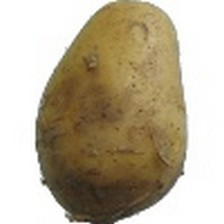

In [9]:
potato_path = pathlib.Path(data_dir) / "Potato"
potato_imgs = list(potato_path.glob('*.jpg'))

Image.open(str(potato_imgs[1]))

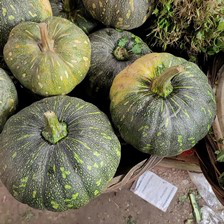

In [10]:
pumpkin_path = pathlib.Path(data_dir) / "Pumpkin"
pumpkin_imgs = list(pumpkin_path.glob('*.jpg'))

Image.open(str(pumpkin_imgs[1]))

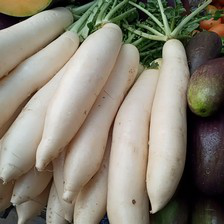

In [11]:
radish_path = pathlib.Path(data_dir) / "Radish"
radish_imgs = list(radish_path.glob('*.jpg'))
                                    
Image.open(str(radish_imgs[0]))

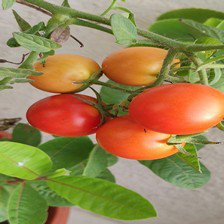

In [12]:
tomato_path = pathlib.Path(data_dir) / "Tomato"
tomato_imgs = list(tomato_path.glob('*.jpg'))

Image.open(str(tomato_imgs[2]))

### Preprocessing and Splitting the data between 80% training and 20% test

Utilizing the torchvision for preprocessing. Applying a series of transformations to the dataset i.e resizing the images into 256*256 pixels, converting to tensors, normalizing the pixel values using standard deviation and mean. The dataset is organised into classes based on the categories of the dataset, splits the dataset into 80-20 ratio using random_split, and then creates the PyTorch dataloaders for train and test data, and the category names holds the class labels of the dataset.

In [13]:
from torchvision import datasets, transforms

# 1. Load the dataset
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Rescale
])

In [14]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

dataset = ImageFolder(data_dir, transform = data_transform)
train_size = int(0.8 * len(dataset))  # Calculate 80% of dataset size
val_size = len(dataset) - train_size  # Calculate 20% of dataset size
train_dataset, validation_dataset = random_split(dataset, [train_size, val_size])

In [15]:
train_dataloader = DataLoader(train_dataset, batch_size=32)
validation_dataloader = DataLoader(validation_dataset, batch_size=32)

In [16]:
category_names = dataset.classes
print("Several categories present in dataset are listed :", category_names)

Several categories present in dataset are listed : ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Broccoli', 'Carrot', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


### Visualize the data

#### Visualizing the first image of all classes in the train_dataloader of the dataset.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


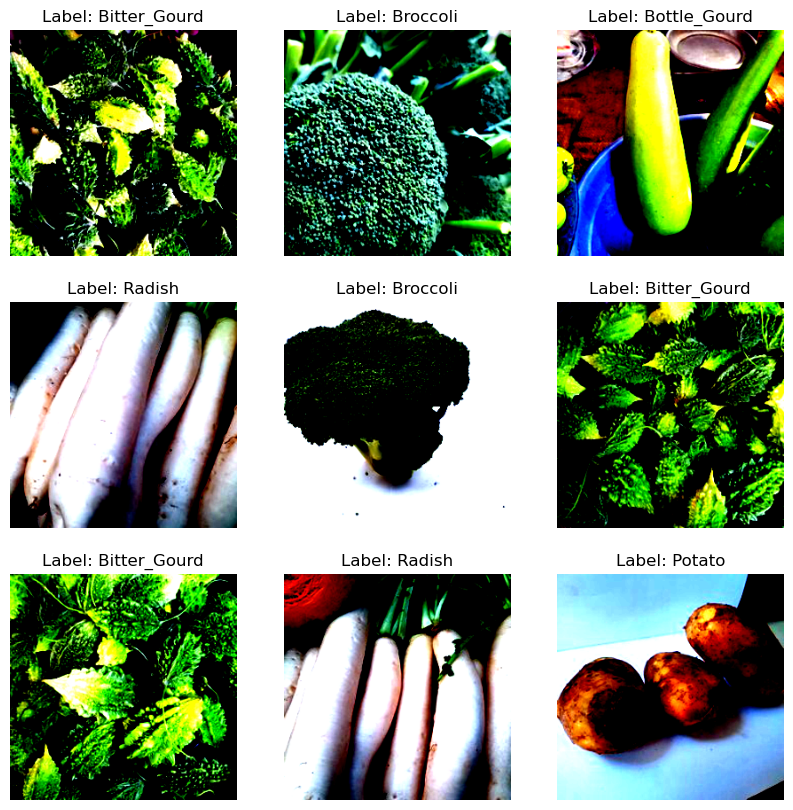

In [17]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Assuming train_dl is your PyTorch DataLoader
# Iterate over the DataLoader directly
for images, labels in train_dataloader:
    # Plot the first 9 images from the batch
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):
        image = images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy array
        plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(f"Label: {category_names[labels[i].item()]}")
        plt.axis("off")
    plt.show()
    break  # Break after processing the first batch


#### Visualizing the random images of all classes in the train_dataloader of the dataset.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


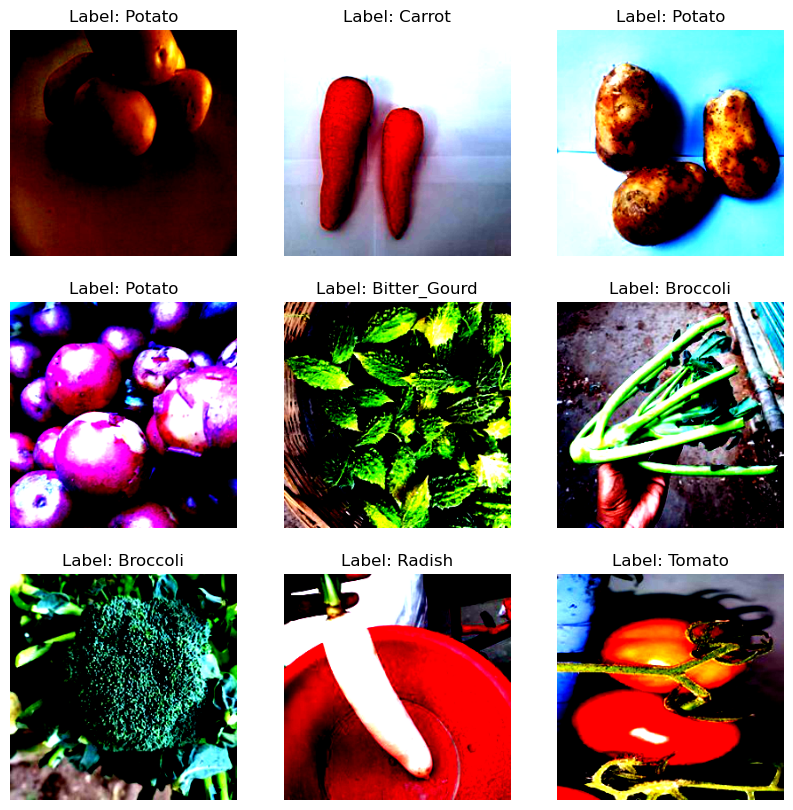

In [18]:
import random

# Get the total number of batches in the DataLoader
total_batches = len(train_dataloader)

# Choose a random batch index
random_batch_index = random.randint(0, total_batches - 1)

# Fetch the random batch of data
for batch_index, (images, labels) in enumerate(train_dataloader):
    if batch_index == random_batch_index:
        plt.figure(figsize=(10, 10))
        for i in range(9):
            image = images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy array
            plt.subplot(3, 3, i + 1)
            plt.imshow(image)
            plt.title(f"Label: {category_names[labels[i].item()]}")
            plt.axis("off")

plt.show()

### Create a Convolutional Neural Network model to learn about your training set 

Trains a model1_CNN for image classification using PyTorch. It includes a training loop that optimizes the model parameters with the Adam optimizer and computes the loss and accuracy metrics for a specified number of epochs. UsedThree convolutional layers (conv1, conv2, conv3) with ReLU activation functions and 3x3 convolutional kernels. Used Max-pooling layers (pool) to reduce the spatial dimensions of the feature maps. A flatten layer to flatten the feature maps into a 1D tensor.
Two fully connected (linear) layers (fc1, fc2) for classification.

In [19]:
import torch
import torch.nn as nn

class CNN_model(nn.Module):
    def __init__(self, num_classes, img_height, img_width):
        super(CNN_model, self).__init__()
        self.rescaling = nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True)
        )
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * (img_height // 8) * (img_width // 8), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.rescaling(x)
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.flatten(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define input dimensions
img_height, img_width = 256, 256
# Define the number of classes
num_classes = 9

# Instantiate the model
model1_CNN = CNN_model(num_classes, img_height, img_width)

#print(model)


Using the Adam optimizer with Cross Entropy Loss and tracks and prints training accuracy and loss over a three number of epochs 

In [20]:
import torch.optim as optim
import torch.nn.functional as F

# Define the optimizer
optimizer = optim.Adam(model1_CNN.parameters())

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the metrics (accuracy)
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Define the training loop
def train_model(model, train_dl, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Set the model to train mode
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in train_dl:
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            # Compute training accuracy
            acc = accuracy(outputs, labels)
            train_acc += acc.item() * images.size(0)

            # Track training loss
            train_loss += loss.item() * images.size(0)

        # Print training statistics
        epoch_loss = train_loss / len(train_dl.dataset)
        epoch_acc = train_acc / len(train_dl.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Train the model
num_epochs = 3  # Choose the number of epochs
train_model(model1_CNN, train_dataloader, criterion, optimizer, num_epochs)

Epoch 1/3, Loss: 1.7791, Accuracy: 0.3997
Epoch 2/3, Loss: 0.8737, Accuracy: 0.7017
Epoch 3/3, Loss: 0.4637, Accuracy: 0.8553


The accuracy in the three epoch was 0.8553 which was improved and loss was 0.4637 which also decreased compared to the first epoch.

### Make predictions on the test data and compare them to the expected categories

In [21]:
# Define the testing loop
def test_model(model, test_dl):
    model.eval()  # Set the model to evalation mode
    test_acc = 0.0

    with torch.no_grad():  # Disable gradient tracking during inference
        for images, labels in test_dl:
            outputs = model(images)

            # Compute test accuracy
            acc = accuracy(outputs, labels)
            test_acc += acc.item() * images.size(0)


    # Print test statistics
    test_acc = test_acc / len(test_dl.dataset)
    print(f"Test Accuracy: {test_acc:.4f}")

# Assuming you have defined your test dataloader as test_dataloader
test_model(model1_CNN, validation_dataloader)


Test Accuracy: 0.7619


The test accuracy obtained was 0.7619

Using the below data augmentation techniques such as random horizontal flips and rotations during training to increase the diversity of the training dataset.

In [22]:
import torch.optim as optim
import torch.nn.functional as F

model2 = CNN_model(num_classes, img_height, img_width)

# Define the optimizer
optimizer = optim.Adam(model2.parameters())

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the metrics (accuracy)
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Define the training loop
def train_model(model, train_dl, criterion, optimizer, num_epochs=3):
    for epoch in range(num_epochs):
        model.train()  # Set the model to train mode
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in train_dl:
            data_augmented_inputs = torch.stack([transforms.RandomHorizontalFlip()(img) for img in images])
            data_augmented_inputs = torch.stack([transforms.RandomRotation(degrees=10)(img) for img in data_augmented_inputs])
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            # Compute training accuracy
            acc = accuracy(outputs, labels)
            train_acc += acc.item() * images.size(0)

            # Track training loss
            train_loss += loss.item() * images.size(0)

        # Print training statistics
        epoch_loss = train_loss / len(train_dl.dataset)
        epoch_acc = train_acc / len(train_dl.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Train the model
num_epochs = 3 # Choose the number of epochs
train_model(model2, train_dataloader, criterion, optimizer, num_epochs)

Epoch 1/3, Loss: 1.6711, Accuracy: 0.4124
Epoch 2/3, Loss: 0.7970, Accuracy: 0.7368
Epoch 3/3, Loss: 0.3811, Accuracy: 0.8725


After using data augumentation techniques, the train accuracy got improved to 0.8725 in third epoch which was earlier 0.8553, similarly the loss also decreased in third epoch which was 0.3811, and without data augumentation the loss was 0.4637 in third epoch.

In [23]:
# Define the testing loop
def test_model(model, test_dl):
    model.eval()  # Set the model to evalation mode
    test_acc = 0.0

    with torch.no_grad():  # Disable gradient tracking during inference
        for images, labels in test_dl:
            outputs = model(images)

            # Compute test accuracy
            acc = accuracy(outputs, labels)
            test_acc += acc.item() * images.size(0)


    # Print test statistics
    test_acc = test_acc / len(test_dl.dataset)
    print(f"Test Accuracy: {test_acc:.4f}")

# Assuming you have defined your test dataloader as test_dataloader
test_model(model2, validation_dataloader)


Test Accuracy: 0.7679


The train and test accuracy got increased after data augumentation.

 Loads an image of broccoli, resizes it to predefined dimensions, and converts it into a PyTorch tensor.

In [24]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import requests
from io import BytesIO
from torch import argmax

img_height, img_width = 256, 256


img = Image.open(('vegetable_dataset_harika/Broccoli/1001.jpg')).convert('RGB')
img = img.resize((img_width, img_height))  # Resize the image to match the model's input size
img_tensor = transforms.ToTensor()(img)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

# Move the tensor to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)


Predicting the class of an input image using a trained neural network model (model2).The softmax function is applied to the output tensor to obtain class probabilities. The predicted class index is extracted, mapped to the corresponding category name, and printed along with the confidence level as a percentage.

In [25]:
# Make predictions
model2.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model2(img_tensor)
    probabilities = torch.softmax(outputs, dim=1)

# Convert tensor to numpy array
predicted_class = category_names[argmax(probabilities)]

# Print the predicted class and confidence
predicted_class = category_names[torch.argmax(probabilities)]
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class} with a {confidence*100:.2f}% confidence.")


This image most likely belongs to Potato with a 45.54% confidence.


Preprocesses an image of a class of the dataset, then utilizes a pre-trained CNN model to predict its class with associated confidence.

In [26]:
# Load and preprocess the unseen image
image_path = 'vegetable_dataset_harika/Broccoli/1001.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

Using model2 on the preprocessed image, extracting the predicted class index and mapping it to the corresponding class name with its confidence level.

In [27]:
# Perform inference
with torch.no_grad():
    output = model2(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
#class_names = ['daisy', 'dandelion']  # Make sure these class names match your training data
predicted_class_name = category_names[predicted_class.item()]
probabilities = torch.softmax(outputs, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")

This image most likely belongs to Pumpkin with a 45.54% confidence.


 Visualizing an image with the predicted class name, As the accuracy and confidence is low, sometimes it is not giving the correct prediction.

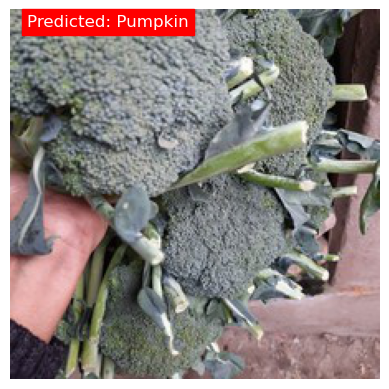

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

### Use GoogleNet(InceptionNet) and add a LinearLayer on top of it.

Using custom neural network by incorporating a pre-trained GoogleNet model with a linear classification layer added. 

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.models import googlenet
from torch.utils.data import DataLoader

# Define the model
class GoogleNetWithLinearTop(nn.Module):
    def __init__(self, num_classes):
        super(GoogleNetWithLinearTop, self).__init__()
        # Load the pre-trained GoogleNet model
        self.googlenet = googlenet(pretrained=True)
        # Freeze the parameters of the GoogleNet model
        for param in self.googlenet.parameters():
            param.requires_grad = False
        # Add a custom linear layer on top for classification
        self.fc = nn.Linear(1000, num_classes)  # Adjust the output size for your task

    def forward(self, x):
        # Forward pass through GoogleNet
        features = self.googlenet(x)
        # Forward pass through the linear layer
        output = self.fc(features)
        return output

# Instantiate the model
num_classes = 9  # Define the number of classes for your task
model3 = GoogleNetWithLinearTop(num_classes)

# Define the optimizer
optimizer = optim.Adam(model3.parameters())

# Define the loss function
criterion = nn.CrossEntropyLoss()



/Users/harikaboyina/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/harikaboyina/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


###  Train the GoogleNet model and compare the accuracy with the first model.

In [30]:
# Define the training loop (assuming train_dataloader is defined)
def train_model(model, train_dl, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Set the model to train mode
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in train_dl:
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            # Compute training accuracy
            _, preds = torch.max(outputs, dim=1)
            acc = torch.sum(preds == labels).item() / len(preds)
            train_acc += acc * len(images)

            # Track training loss
            train_loss += loss.item() * len(images)

        # Print training statistics
        epoch_loss = train_loss / len(train_dl.dataset)
        epoch_acc = train_acc / len(train_dl.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Train the model
num_epochs = 3  # Choose the number of epochs
train_model(model3, train_dataloader, criterion, optimizer, num_epochs)


Epoch 1/3, Loss: 0.5751, Accuracy: 0.8523
Epoch 2/3, Loss: 0.0794, Accuracy: 0.9888
Epoch 3/3, Loss: 0.0525, Accuracy: 0.9955


In [31]:
# Define the validation loop
def validate_model(model, val_dl, criterion):
    model3.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_acc = 0.0

    with torch.no_grad():  # Disable gradient tracking during validation
        for images, labels in val_dl:
            outputs = model3(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss

            # Compute validation accuracy
            _, preds = torch.max(outputs, dim=1)
            acc = torch.sum(preds == labels).item() / len(preds)
            val_acc += acc * len(images)

            # Track validation loss
            val_loss += loss.item() * len(images)

    # Print validation statistics
    val_loss = val_loss / len(val_dl.dataset)
    val_acc = val_acc / len(val_dl.dataset)
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

# Assuming you have defined your validation dataloader as validation_dataloader
validate_model(model3, validation_dataloader, criterion)


Validation Loss: 0.0391, Validation Accuracy: 0.9970


#### After using the GoogleNet(InceptionNet) with LinearLayer the test accuracy got increased significantly, loss decreased indicating improved performance in minimizing errors during training and predicting the image with higher percentage of confidence and this model is predicting the class of the image very accurately when compared with the first model(CNN).  The GoogleNet model provides predictions with higher confidence levels, suggesting that it is more confident in its predictions compared to the baseline CNN model.

In [32]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import requests
from io import BytesIO
from torch import argmax

img_height, img_width = 256, 256


img = Image.open(('vegetable_dataset_harika/Bean/0010.jpg')).convert('RGB')
img = img.resize((img_width, img_height))  # Resize the image to match the model's input size
img_tensor = transforms.ToTensor()(img)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

# Move the tensor to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)


In [33]:
# Make predictions
model3.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model3(img_tensor)
    probabilities = torch.softmax(outputs, dim=1)

# Convert tensor to numpy array
predicted_class = category_names[argmax(probabilities)]

# Print the predicted class and confidence
predicted_class = category_names[torch.argmax(probabilities)]
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class} with a {confidence*100:.2f}% confidence.")


This image most likely belongs to Bean with a 95.55% confidence.


In [34]:
# Load and preprocess the unseen image
image_path = 'vegetable_dataset_harika/Bean/0010.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

In [35]:
# Perform inference
with torch.no_grad():
    output = model3(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
#class_names = ['daisy', 'dandelion']  # Make sure these class names match your training data
predicted_class_name = category_names[predicted_class.item()]
probabilities = torch.softmax(outputs, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")

This image most likely belongs to Bean with a 95.55% confidence.


After using the GoogleNet(InceptionNet) with LinearLayer, the accuracy and confidence is high and predicted the correct class of the image for every run.

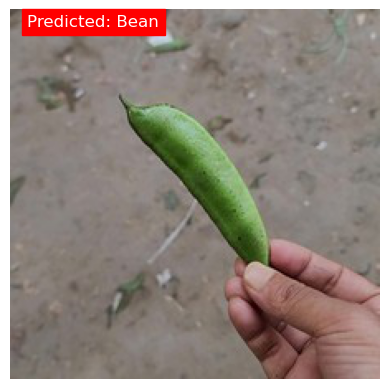

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

### GITHUB link : https://github.com/Harika061/Deeplearning-course-Homework/blob/main/Homework3_Harika_Boyina.ipynb